# Predicting Boston housing price using XGBoost

In [19]:
import numpy as np

In [11]:
import pandas as pd

In [18]:
import xgboost as xgb

In [1]:
import sklearn as skl

In [3]:
from sklearn.datasets import load_boston

In [33]:
from sklearn.model_selection import train_test_split

In [5]:
boston = load_boston()

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Set our training target - price

In [14]:
df['PRICE'] = boston.target

In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


Parse the data

In [31]:
X, y = df.iloc[:, :-1], df.iloc[:, [-1]]

In [32]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

Save the data into dmatrix data structure for later uses

In [32]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

## Tuning hyperparameters

A whole list of parameters can be find in this [link](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters). Here are some important ones:

* learning rate
* max_depth: the depth of each tree
* subsample: percentage of samples used per tree. Low value can lead to underfitting
* colsample_bytree: percentage of features used per tree. High value can lead to overfitting
* n_estimators: number of trees
* objective: the loss function
    * 'reg:squarederror'
    * 'reg:logistic'
    * 'binary:logistic'
    * 'multi:softmax'
    * ...

And regularization parameters:
* gamma: controls whether a tree will split based on the expected reduction of loss after the split. A higher value leads to fewer splits
* alpha: L1 regularization on leaf weights
* lambda: L2 regularization on leaf weights

In [67]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1,
                         max_depth=5, subsample=1, colsample_bytree=0.3,
                         n_estimators=10, alpha=10)

In [68]:
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [69]:
preds = xg_reg.predict(X_test)

In [70]:
rmse = np.sqrt(skl.metrics.mean_squared_error(y_test, preds))

In [71]:
rmse

9.8216711826008

### Compare to random forest ensemble

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rf_reg = RandomForestRegressor(max_depth=5, n_estimators=10, random_state=34)

In [88]:
rf_reg.fit(X_train, y_train['PRICE'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=34, verbose=0, warm_start=False)

In [89]:
rf_preds = rf_reg.predict(X_test)

In [90]:
rf_rmse = np.sqrt(skl.metrics.mean_squared_error(y_test, rf_preds))

In [91]:
rf_rmse

3.308577810803975

## k-fold cross validation

In [95]:
params = {'objective': 'reg:squarederror',
          'learning_rate': 0.1,
          'max_depth': 5,
          'colsample_bytree': 0.3,
          'alpha': 10
         }

In [96]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                   num_boost_round=50, early_stopping_rounds=10,
                   metrics='rmse', as_pandas=True, seed=34)

In [119]:
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
45,2.311355,0.036301,3.742303,0.331541
46,2.294203,0.036040,3.730521,0.334747
47,2.274263,0.039321,3.725320,0.332923
48,2.241602,0.030372,3.717150,0.327514
49,2.206517,0.032336,3.706605,0.314619


## Visualize tree

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

### Visualize a tree

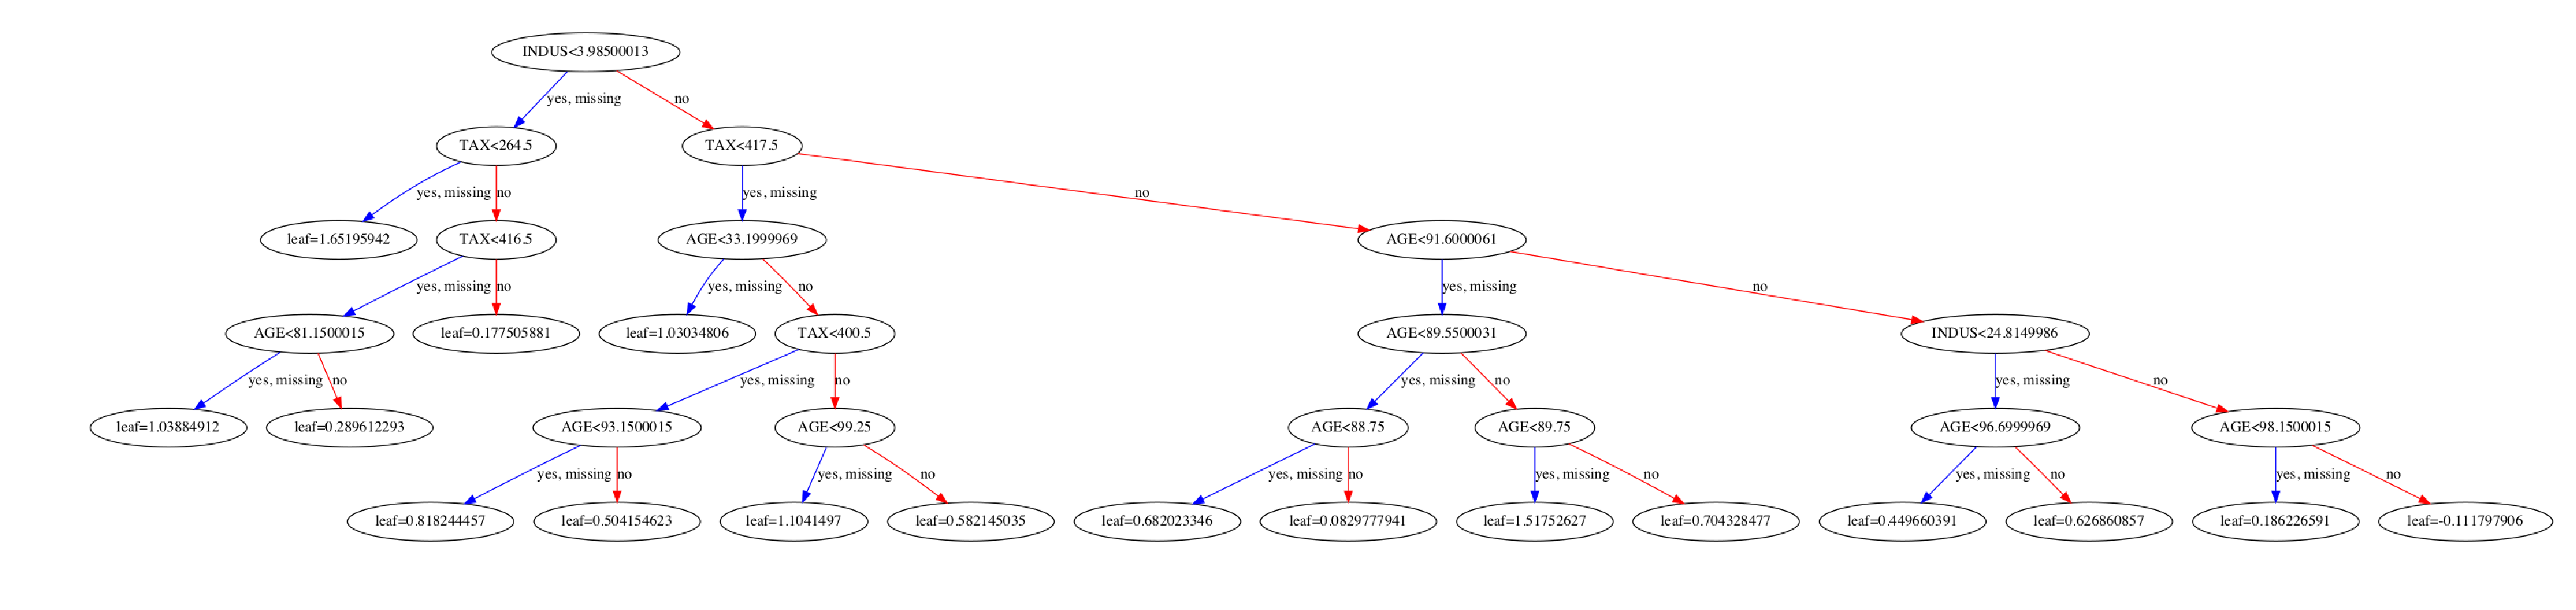

In [129]:
fig = plt.figure(figsize=(16, 6), dpi=300)
xgb.plot_tree(xg_reg, num_trees=9, ax=plt.gca())

### Visualize importances

The F score here means frequency score, which is the count of each feature that trees splitted on.

In [131]:
xgb.plot_importance?

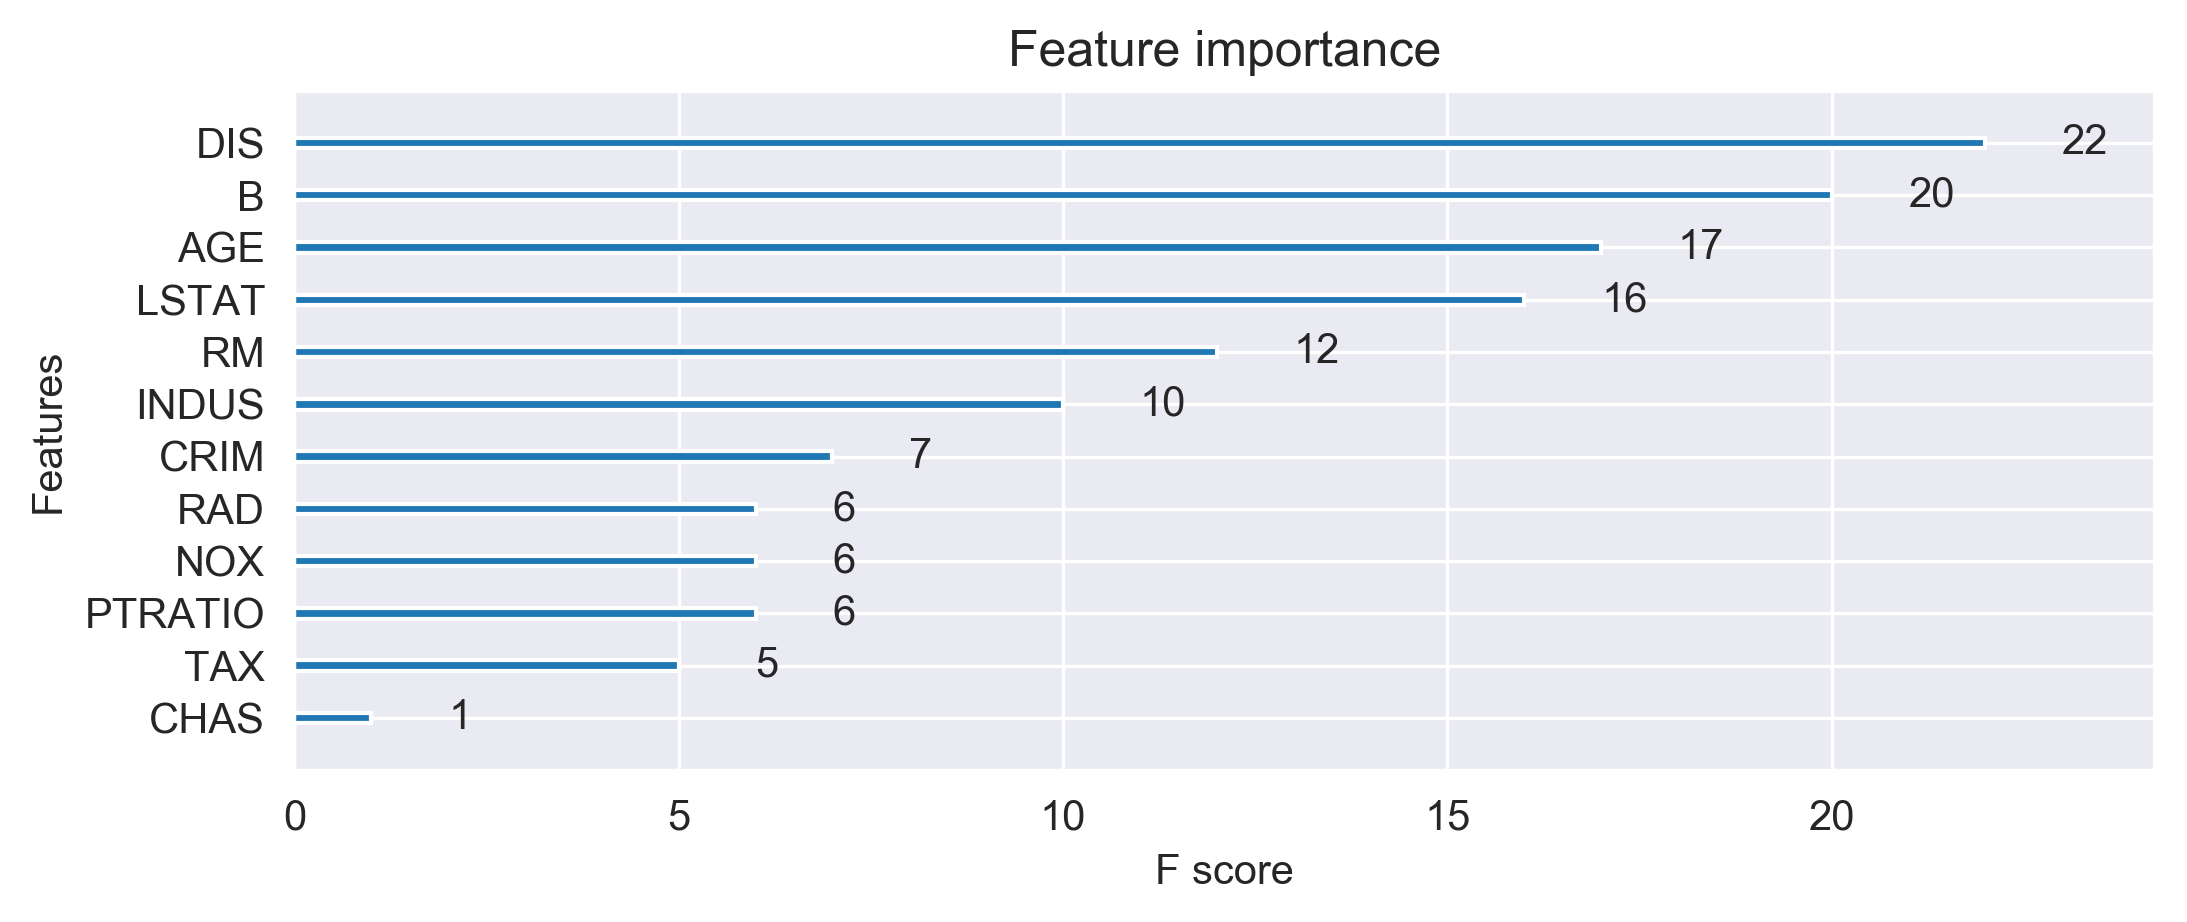

In [130]:
fig, ax = plt.subplots(1, figsize=(8, 3), dpi=300)
xgb.plot_importance(xg_reg, ax=ax)